In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/DataScience_jobs.csv')

In [3]:
df.head()

,Unnamed: 0,roles,companies,locations,experience,skills
0,0,Data Scientist/ Academic Counselor,GREAT LAKES E-LEARNING SERVICES PRIVATE LIMITED,"Chennai, Bengaluru",2-7 Yrs,Data Science\nArtificial Intelligence\ntrainin...
1,1,Data Scientist,Shell India Markets Private Limited,Chennai,5-7 Yrs,Data Science\nMultivariate Analysis\nFactor An...
2,2,Senior Data Scientist,Decision Point,Gurgaon,3-5 Yrs,Azure\ntimeseries forecasting\nMachine Learnin...
3,3,Data Scientist - Machine Learning & Statistica...,Talent Stock Solutions,Delhi,2-5 Yrs,Data Science\nR\nC\nData Scientist\nStatistica...
4,4,Data Scientist,Zen3Tech (A Tech Mahindra Company),Hyderabad,3-8 Yrs,R\nA/B Testing\nData Manipulation\nMachine Lea...


In [4]:
df.isnull().sum()

Unnamed: 0    0
roles         0
companies     0
locations     0
experience    0
skills        3
dtype: int64

In [5]:
df=df.dropna()

In [6]:
df.isnull().sum()

Unnamed: 0    0
roles         0
companies     0
locations     0
experience    0
skills        0
dtype: int64

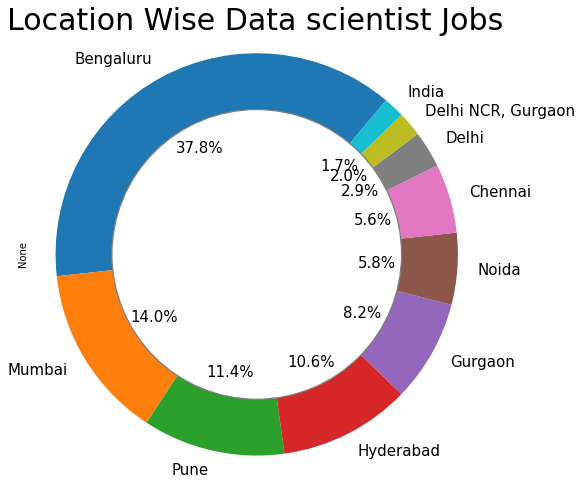

In [7]:
df.locations.apply(pd.Series).stack().str.strip().value_counts()[:10].plot.pie(figsize=(8,8),startangle=50,autopct='%1.1f%%',fontsize=15)
plt.title("Location Wise Data scientist Jobs",fontsize=30)

#https://medium.com/@krishnakummar/donut-chart-with-python-matplotlib-d411033c960b
centre_circle = plt.Circle((0,0),0.72,color='gray', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.show()

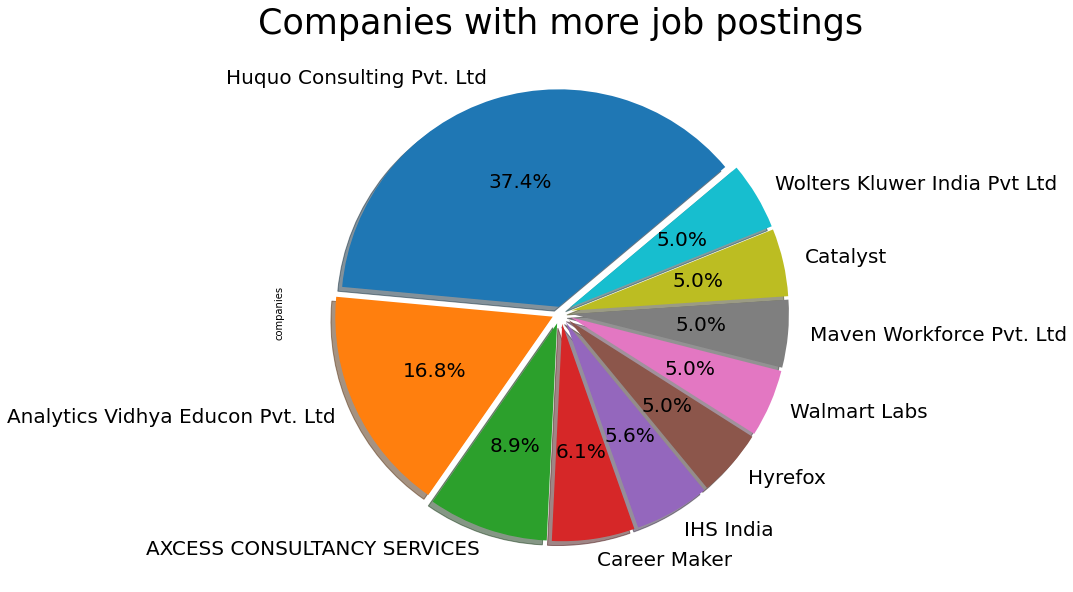

In [8]:
df["companies"].value_counts()[:10].plot.pie(figsize=(12,10),explode=[0.03,0.04,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05],shadow=True, startangle=40,autopct='%1.1f%%',fontsize=20)
plt.title("Companies with more job postings",fontsize=35)
plt.show()

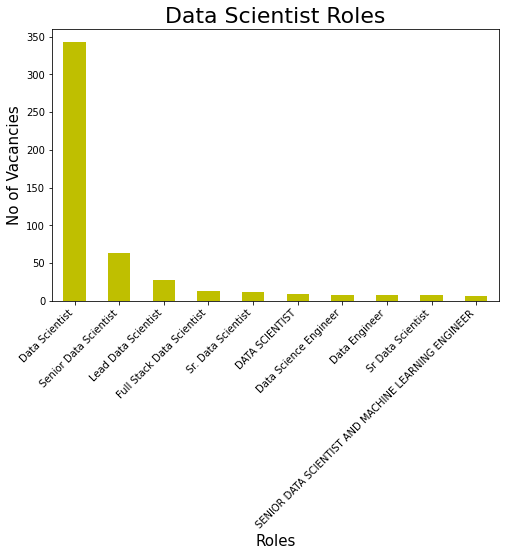

In [9]:
df["roles"].value_counts()[:10].plot.bar(figsize=(8,5),fontsize=10,color="y")#(figsize=(10,10),explode=[0.05,0.04,0.05,0,0,0,0,0,0,0],shadow=True, startangle=50,autopct='%1.1f%%')
plt.xticks(rotation=45,ha='right')
plt.title("Data Scientist Roles",fontsize=22)
plt.ylabel("No of Vacancies",fontsize=15,rotation=90)
plt.xlabel("Roles",fontsize=15)
plt.show()

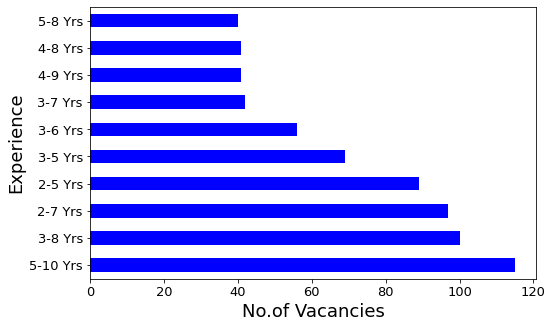

In [10]:
df["experience"].value_counts()[:10].plot.barh(figsize=(8,5),fontsize=13,color="b")
plt.xlabel("No.of Vacancies",fontsize=18)
plt.ylabel("Experience",fontsize=18)
plt.show()

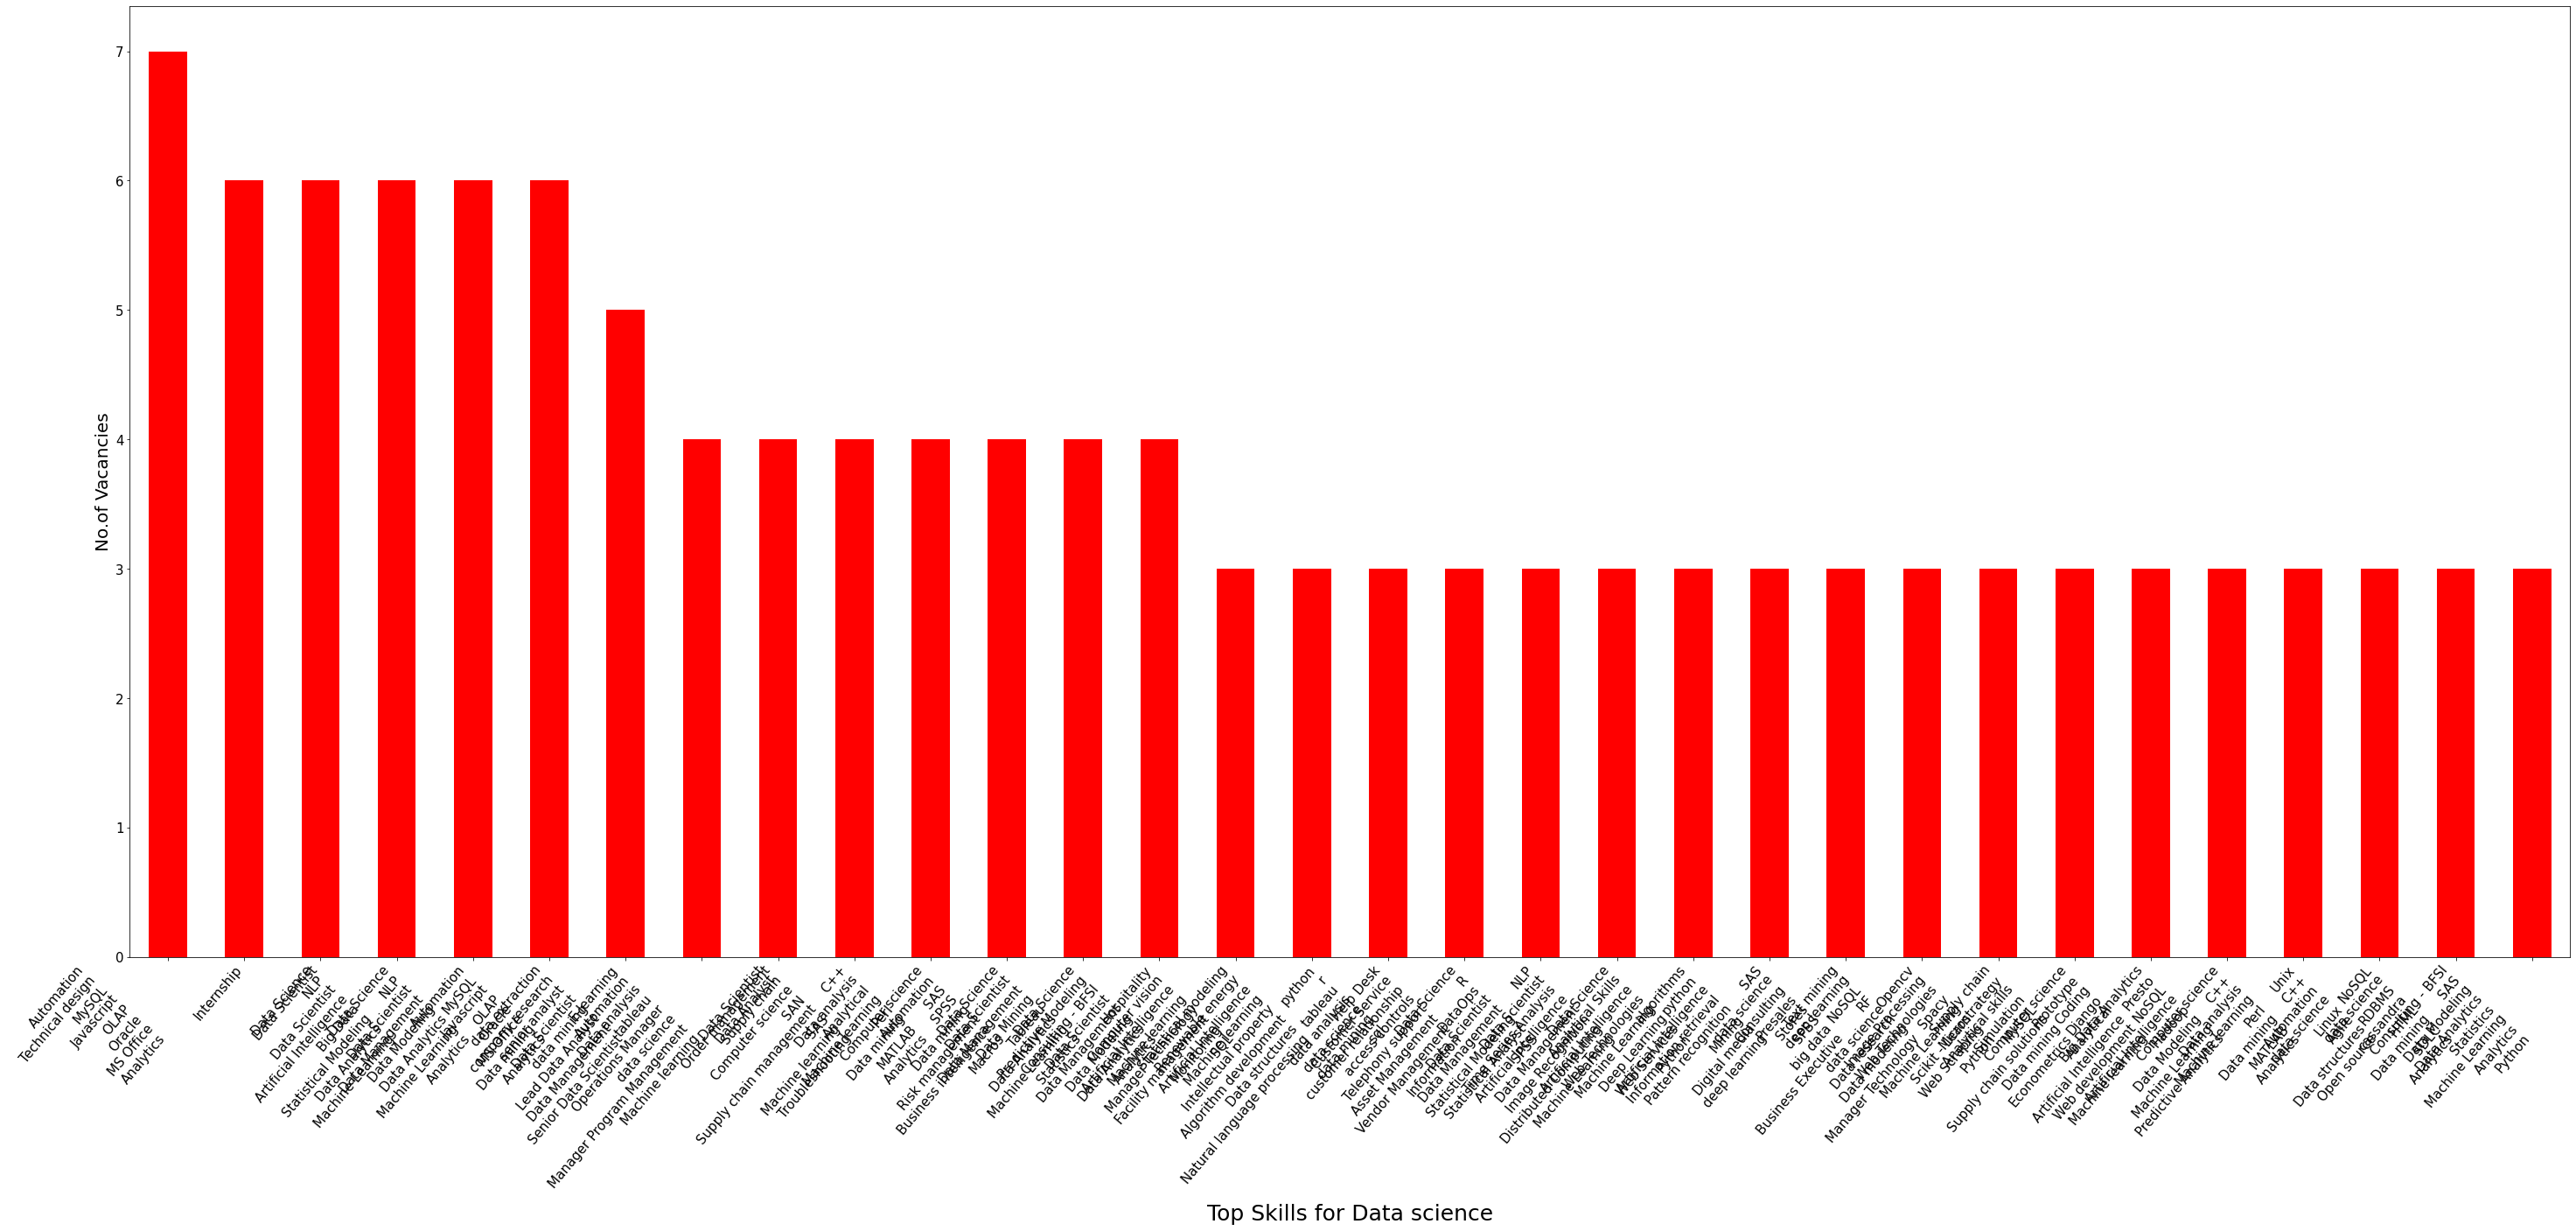

In [11]:
df.skills.apply(pd.Series).stack().value_counts()[:32].plot(kind="bar",figsize=(50,20),fontsize=15,color="r")
plt.xticks(rotation=50,ha='right')
#plt.title("Top Skills for Data science",fontsize=25)
plt.ylabel("No.of Vacancies",fontsize=20)
plt.xlabel("Top Skills for Data science",fontsize=25)
plt.show()

In [12]:
jj=pd.DataFrame(df.skills.apply(pd.Series).stack().value_counts()).reset_index()
jj.columns=["skills","count"]
jj.head()

,skills,count
0,Automation\nTechnical design\nMySQL\nJavascrip...,7
1,Internship,6
2,Data Scientist,6
3,Data Science\nNLP\nData Scientist\nArtificial ...,6
4,Data Science\nNLP\nData Scientist\nData Manage...,6


In [13]:
datascience={}
datascience['statistics']=jj["count"][jj['skills'].str.contains('stat', regex=True)].sum()
datascience['machine_learning']=jj["count"][jj['skills'].str.contains('machine |^ml', regex=True)].sum()
datascience['data_analysis']=jj["count"][jj['skills'].str.contains('data ana', regex=True)].sum()
datascience['data_mining']=jj["count"][jj['skills'].str.contains('mining', regex=True)].sum()
datascience['nlp']=jj["count"][jj['skills'].str.contains('nlp|natural', regex=True)].sum()
datascience['computer_vision']=jj["count"][jj['skills'].str.contains('computer vision', regex=True)].sum()
datascience['deep_learning']=jj["count"][jj['skills'].str.contains('deep learning', regex=True)].sum()
datascience['big_data']=jj["count"][jj['skills'].str.contains('big', regex=True)].sum()
from operator import itemgetter
datascience=dict(sorted(datascience.items(), key=itemgetter(1),reverse=True))
datascience


{'big_data': 58,
 'computer_vision': 0,
 'data_analysis': 33,
 'data_mining': 214,
 'deep_learning': 67,
 'machine_learning': 40,
 'nlp': 11,
 'statistics': 23}

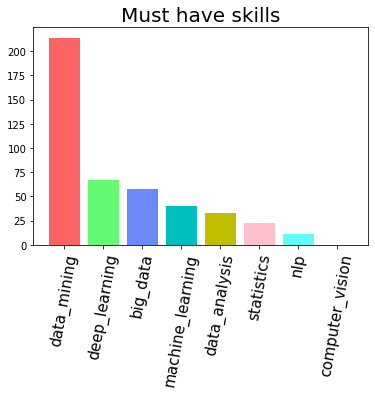

In [14]:
plt.bar(datascience.keys(),datascience.values(),color=["#FE6363","#66FA72","#6B89F9","c","y","pink","#63FCFE","#DD63FE"])
plt.xticks(rotation=80,fontsize=15)
plt.title("Must have skills",fontsize=20)
plt.show()

In [15]:
languages={}
languages["python"]=jj["count"][jj['skills'].str.contains('python', regex=True)].sum()
languages["r"]=jj["count"][jj['skills'].str.contains('^r$', regex=True)].sum()
languages["matlab"]=jj["count"][jj['skills'].str.contains('matlab', regex=True)].sum()
languages["java"]=jj["count"][jj['skills'].str.contains('java$', regex=True)].sum()
languages["c++"]=jj["count"][jj['skills'].str.contains('c\+', regex=True)].sum()
languages["sas"]=jj["count"][jj['skills'].str.contains('sas', regex=True)].sum()

#to identify the Sql first and then seperate the nosql from the list
sql=jj[jj['skills'].str.contains('sql', regex=True)]
languages["sql"]=sql["count"][~sql['skills'].str.contains('no', regex=True)].sum()

#to sort the dictionary
languages=dict(sorted(languages.items(), key=itemgetter(1),reverse=True))

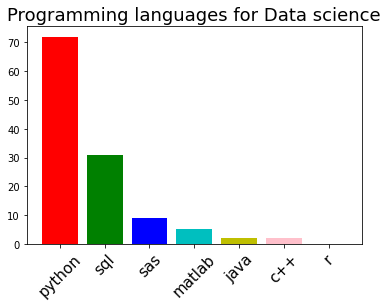

In [16]:
plt.bar(languages.keys(),languages.values(),color=["r","g","b","c","y","pink","m"])
plt.xticks(rotation=45,fontsize=15)
plt.title("Programming languages for Data science",fontsize=18)
plt.show()

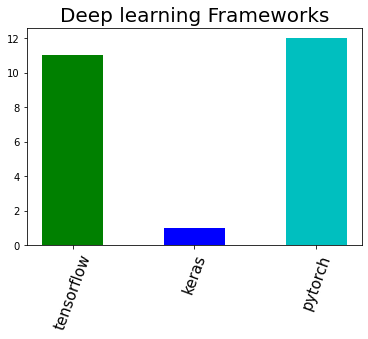

In [17]:
frameworks={}
frameworks['tensorflow']=jj["count"][jj['skills'].str.contains('tensor', regex=True)].sum()
frameworks['keras']=jj["count"][jj['skills'].str.contains('keras', regex=True)].sum()
frameworks['pytorch']=jj["count"][jj['skills'].str.contains('torch', regex=True)].sum()
plt.bar(frameworks.keys(),frameworks.values(),color=["g","b","c"],width=.5)
plt.xticks(rotation=70,fontsize=15)
plt.title("Deep learning Frameworks",fontsize=20)
plt.show()

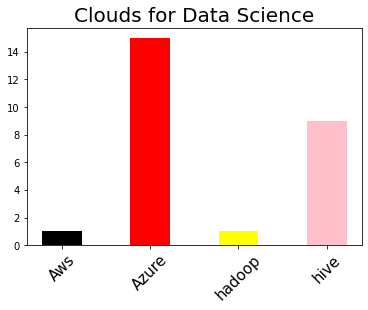

In [18]:
cloud={}
cloud['Aws']=jj["count"][jj['skills'].str.contains('Aws', regex=True)].sum()
cloud['Azure']=jj["count"][jj['skills'].str.contains('Azure', regex=True)].sum()
cloud['hadoop']=jj["count"][jj['skills'].str.contains('hadoop')].sum()
cloud['hive']=jj["count"][jj['skills'].str.contains('hive')].sum()
plt.bar(cloud.keys(),cloud.values(),color=["black","red","yellow","pink",],width=.45)
plt.xticks(rotation=45,fontsize=15)
plt.title("Clouds for Data Science",fontsize=20)
plt.show()

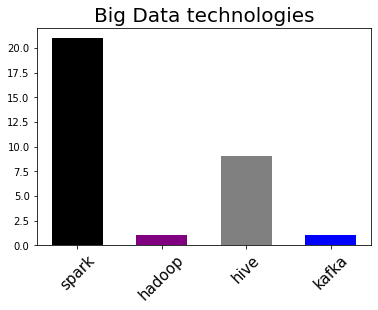

In [19]:
bigdata={}
bigdata["spark"]=jj["count"][jj['skills'].str.contains('spark', regex=True)].sum()
bigdata["hadoop"]=jj["count"][jj['skills'].str.contains('hadoop', regex=True)].sum()
bigdata["hive"]=jj["count"][jj['skills'].str.contains('hive', regex=True)].sum()
bigdata["kafka"]=jj["count"][jj['skills'].str.contains('kafka', regex=True)].sum()

plt.bar(bigdata.keys(),bigdata.values(),color=["black","purple","grey","blue"],width=0.6)
plt.xticks(rotation=45,fontsize=15)
plt.title("Big Data technologies",fontsize=20)
plt.show()

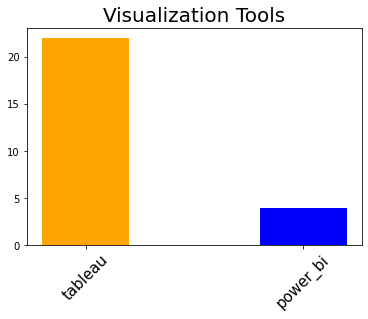

In [20]:
tools={}
tools["tableau"]=jj["count"][jj['skills'].str.contains('tableau', regex=True)].sum()
tools["power_bi"]=jj["count"][jj['skills'].str.contains('power bi', regex=True)].sum()


plt.bar(tools.keys(),tools.values(),color=["orange","blue"],width=(0.4))
plt.xticks(rotation=45,fontsize=15)
plt.title("Visualization Tools",fontsize=20)
plt.show()